# 第5章 線形系回帰予測を行う10本ノック

## ノック41:データを加工しよう

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()

import pandas as pd

df = pd.DataFrame(boston.data,columns=boston.feature_names)
df["MEDV"] = boston.target

display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
X= df[boston.feature_names]
y = df[["MEDV"]]

display(X.head())
display(y.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

print(len(X_train))
display(X_train.head())
print(len(X_test))
display(X_test.head())

354


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93


152


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34


## ノック42:データをスケーリングしよう

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:3])
print(X_test_scaled[:3])

[[-0.20735619 -0.49997924  1.54801583 -0.26360274  0.58821309 -1.83936729
   1.10740225 -1.1251102  -0.61816013  0.20673466  1.2272573   0.42454294
   3.10807269]
 [-0.38886492  0.34677427 -0.58974728 -0.26360274 -0.79782145  0.32748658
  -0.36766106  0.07509    -0.73363701 -1.04949303  0.05696346  0.40185312
  -0.66643035]
 [-0.33573486 -0.49997924  1.54801583 -0.26360274  0.58821309  0.03790703
   1.04311378 -0.79998434 -0.61816013  0.20673466  1.2272573   0.39846135
   0.63936662]]
[[-0.39454262 -0.49997924 -1.12239824 -0.26360274 -0.83247231  0.03505403
  -1.84986753  0.70330504 -0.61816013  0.1656431  -0.70822867  0.17086147
  -0.72160487]
 [ 0.70419882 -0.49997924  1.00534187 -0.26360274  0.6488521  -0.1318465
   1.10740225 -1.25602264  1.69137745  1.55101569  0.77714428  0.0648977
  -0.41177872]
 [-0.38890688 -0.49997924  0.4025299   3.79358727 -0.05282788  0.09211404
   0.83596203 -0.19332167 -0.50268325 -0.73837122 -0.93328518  0.38758427
  -0.27454978]]


## ノック43:重回帰モデルを構築しよう

In [5]:
from sklearn.linear_model import LinearRegression

multi_reg = LinearRegression().fit(X_train_scaled, y_train)

In [6]:
y_train_pred = multi_reg.predict(X_train_scaled)
y_test_pred = multi_reg.predict(X_test_scaled)

print(len(y_train_pred))
print(y_train_pred[:5])
print(len(y_test_pred))
print(y_test_pred[:5])

354
[[ 4.58009023]
 [28.38354012]
 [17.27775551]
 [29.39070404]
 [20.54476971]]
152
[[24.9357079 ]
 [23.75163164]
 [29.32638296]
 [11.97534566]
 [21.37272478]]


## ノック44:重回帰モデルを評価しよう

ValueError: ignored

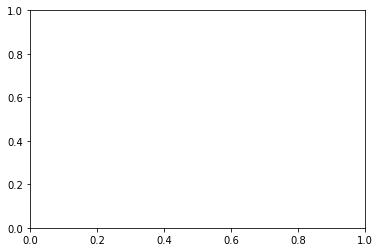

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_train, y_train_pred, label="train")
plt.scatter(X_test, y_test_pred, label="test")
plt.xlabel("X")
plt.ylabel("y")
plt.title("multi_reg")
plt.legend()
plt.show()

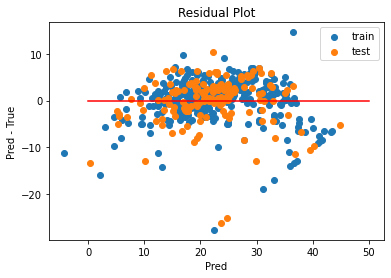

In [9]:
  def residual_plot(y_train_pred, y_train, y_test_pred, y_test):
    plt.scatter(y_train_pred, y_train_pred - y_train, label="train")
    plt.scatter(y_test_pred, y_test_pred - y_test, label="test")
    plt.plot([0, 50], [0,0] ,color="red")
    plt.xlabel("Pred")
    plt.ylabel("Pred - True")
    plt.title("Residual Plot")
    plt.legend()
    plt.show()

  residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def get_eval_score(y_true,y_pred):

      mae = mean_absolute_error(y_true,y_pred)
      mse = mean_squared_error(y_true,y_pred)
      rmse = np.sqrt(mse)
      r2score = r2_score(y_true,y_pred)

      print(f"  MAE = {mae}")
      print(f"  MSE = {mse}")
      print(f"  RMSE = {rmse}")
      print(f"  R2 = {r2score}")

print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 3.103606103908003
  MSE = 19.958219814238046
  RMSE = 4.4674623461466405
  R2 = 0.7645451026942549
テストデータスコア
  MAE = 3.6099040603818127
  MSE = 27.195965766883212
  RMSE = 5.214975145375403
  R2 = 0.6733825506400195


## ノック45:各説明変数の重みを確認しよう

In [11]:
for i, (col, coef) in enumerate(zip(boston.feature_names, multi_reg.coef_[0])):
    print(f"w{i}({col}) = {coef}")
print(f"b = {multi_reg.intercept_[0]}")

w0(CRIM) = -1.0119005895981514
w1(ZN) = 1.05028027430327
w2(INDUS) = 0.07920966467269663
w3(CHAS) = 0.6189619959077586
w4(NOX) = -1.8736910171630774
w5(RM) = 2.7052697851113185
w6(AGE) = -0.2795726389183015
w7(DIS) = -3.0976648638690585
w8(RAD) = 2.0968999836727633
w9(TAX) = -1.886063390978692
w10(PTRATIO) = -2.261104660798766
w11(B) = 0.5826430949043788
w12(LSTAT) = -3.440498377942621
b = 22.7454802259887


## ノック46:LASSO回帰モデルを構築しよう

In [12]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train_scaled, y_train)

In [13]:
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

print(y_train_pred[:5])
print(y_test_pred[:5])

[ 5.03643518 25.9286159  18.46752392 29.47865897 18.4365082 ]
[26.55391836 22.19789402 25.69495337 13.89444507 22.33714854]


In [14]:
y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

print(y_train_pred[:5])
print(y_test_pred[:5])

[[ 5.03643518]
 [25.9286159 ]
 [18.46752392]
 [29.47865897]
 [18.4365082 ]]
[[26.55391836]
 [22.19789402]
 [25.69495337]
 [13.89444507]
 [22.33714854]]


## ノック47:LASSO回帰モデルを評価しよう

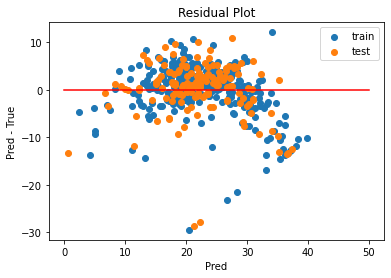

In [15]:
residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [16]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 3.5699072408087855
  MSE = 26.04321595909546
  RMSE = 5.103255427577133
  R2 = 0.6927580317165543
テストデータスコア
  MAE = 3.957998413357712
  MSE = 33.31083886715502
  RMSE = 5.771554285212521
  R2 = 0.5999442961470397


In [17]:
for i, (col, coef) in enumerate(zip(boston.feature_names, lasso.coef_)):
    print(f"w{i}({col}) = {coef}")
print(f"b = {lasso.intercept_[0]}")

w0(CRIM) = -0.034090271533184675
w1(ZN) = 0.0
w2(INDUS) = -0.0
w3(CHAS) = 0.0
w4(NOX) = -0.0
w5(RM) = 2.675474907498284
w6(AGE) = -0.0
w7(DIS) = -0.0
w8(RAD) = -0.0
w9(TAX) = -0.11974266293161703
w10(PTRATIO) = -1.7848358849469905
w11(B) = 0.002439893578826455
w12(LSTAT) = -3.4042835866347296
b = 22.7454802259887


## ノック48:LASSO回帰のハイパーパラメータを変更しよう

In [18]:
lasso_change_param = Lasso(alpha=10).fit(X_train_scaled, y_train)

In [19]:
for i, (col, coef) in enumerate(zip(boston.feature_names, lasso_change_param.coef_)):
    print(f"w{i}({col}) = {coef}")
print(f"b = {lasso_change_param.intercept_}")

w0(CRIM) = -0.0
w1(ZN) = 0.0
w2(INDUS) = -0.0
w3(CHAS) = 0.0
w4(NOX) = -0.0
w5(RM) = 0.0
w6(AGE) = -0.0
w7(DIS) = 0.0
w8(RAD) = -0.0
w9(TAX) = -0.0
w10(PTRATIO) = -0.0
w11(B) = 0.0
w12(LSTAT) = -0.0
b = [22.74548023]


## ノック49:交差検証で最適なパラメータを見つけよう

In [20]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=[0.1, 0.5, 1, 5, 10]).fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
print(f"alpha = {lasso_cv.alpha_}")
for i, (col, coef) in enumerate(zip(boston.feature_names, lasso_cv.coef_)):
    print(f"w{i}({col}) = {coef}")
print(f"b = {lasso_cv.intercept_}")

alpha = 0.1
w0(CRIM) = -0.7133034000316576
w1(ZN) = 0.7015825573132028
w2(INDUS) = -0.06950534556200699
w3(CHAS) = 0.6039977960951488
w4(NOX) = -1.4442274438641602
w5(RM) = 2.8342862608317847
w6(AGE) = -0.0896461992826957
w7(DIS) = -2.345931843873984
w8(RAD) = 0.6393481046889836
w9(TAX) = -0.6573788858076542
w10(PTRATIO) = -2.1636762295988836
w11(B) = 0.47238047527334187
w12(LSTAT) = -3.5044268386860917
b = 22.7454802259887


In [22]:
y_train_pred = lasso_cv.predict(X_train_scaled)
y_test_pred = lasso_cv.predict(X_test_scaled)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

In [23]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 3.114624214010965
  MSE = 20.417290181302135
  RMSE = 4.51854956609996
  R2 = 0.759129270664182
テストデータスコア
  MAE = 3.6229879738141184
  MSE = 28.313208860876916
  RMSE = 5.321015773409896
  R2 = 0.6599647116559878


## ノック50:リッジ回帰でモデルを構築・評価しよう

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)

In [25]:
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

print(y_train_pred[:5])
print(y_test_pred[:5])

[[ 4.62395491]
 [28.33619682]
 [17.31360342]
 [29.40211899]
 [20.44193208]]
[[25.02744738]
 [23.68518081]
 [29.29615023]
 [11.96912308]
 [21.39740217]]


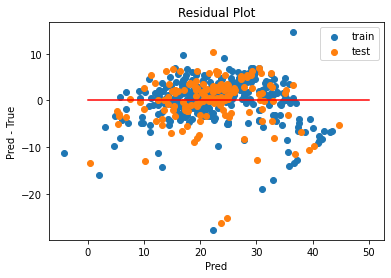

In [26]:
residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [27]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 3.10006827474038
  MSE = 19.959850066669595
  RMSE = 4.467644800862038
  R2 = 0.7645258699709747
テストデータスコア
  MAE = 3.6101074898564725
  MSE = 27.2466563210925
  RMSE = 5.219832978275503
  R2 = 0.672773768452823


In [28]:
for i, (col, coef) in enumerate(zip(boston.feature_names, ridge.coef_[0])):
    print(f"w{i}({col}) = {coef}")
print(f"b = {ridge.intercept_[0]}")

w0(CRIM) = -1.0020066322842396
w1(ZN) = 1.031478992058371
w2(INDUS) = 0.049805093928139414
w3(CHAS) = 0.6237499859394341
w4(NOX) = -1.8352627540651447
w5(RM) = 2.7157280094630543
w6(AGE) = -0.2854477814690179
w7(DIS) = -3.0588996489766935
w8(RAD) = 2.011591128184177
w9(TAX) = -1.8065108419760063
w10(PTRATIO) = -2.251976581476501
w11(B) = 0.5829303480062241
w12(LSTAT) = -3.4245574982351346
b = 22.7454802259887
